<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#read-the-data" data-toc-modified-id="read-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>read the data</a></span><ul class="toc-item"><li><span><a href="#control:-music-only-users" data-toc-modified-id="control:-music-only-users-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>control: music only users</a></span></li><li><span><a href="#control:-seekers" data-toc-modified-id="control:-seekers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>control: seekers</a></span></li></ul></li><li><span><a href="#let's-match----need-to-do-for-twice" data-toc-modified-id="let's-match----need-to-do-for-twice-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>let's match -- need to do for twice</a></span></li><li><span><a href="#let's-start-post-evaluation" data-toc-modified-id="let's-start-post-evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>let's start post evaluation</a></span><ul class="toc-item"><li><span><a href="#evaluation-for-first-match:-music-vs-finders/lovers" data-toc-modified-id="evaluation-for-first-match:-music-vs-finders/lovers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>evaluation for first match: music vs finders/lovers</a></span></li><li><span><a href="#evaluation-for-the-seekers-vs.-finders/lovers" data-toc-modified-id="evaluation-for-the-seekers-vs.-finders/lovers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>evaluation for the seekers vs. finders/lovers</a></span></li></ul></li><li><span><a href="#daily-stream:-before-vs.-after" data-toc-modified-id="daily-stream:-before-vs.-after-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>daily stream: before vs. after</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
import Matcher2 as Matcher2

In [3]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ls

Best_prediction-SampleWeight.ipynb*
Matcher2.py*
Mindset_data_feature_preparing.ipynb*
Mindset_data_prep_BIGQRY.ipynb*
Untitled1.ipynb
__pycache__/
create_samples.ipynb
examples/
exploration_user_consumption.ipynb
featureTesting_prediction-oversampling.ipynb*
functions.py*
functions2.py*
get-matched-control-users.ipynb*
match_controls_fullfeatures.ipynb
matching.ipynb


### read the data

In [4]:
treatment= pd.read_csv('/Users/angli/Documents/documents/projects/data/treatment_allfeatures.csv')

#### control: music only users

In [5]:
control= pd.read_csv('/Users/angli/Documents/documents/projects/data/controlbase_allfeatures.csv')

#### control: seekers

In [5]:
control = pd.read_csv('/Users/angli/Documents/documents/projects/data/nonconvertbase_allfeatures.csv')

In [6]:
treatment["treatment"] = 1
control["treatment"] = 0

In [7]:
treatment["user_age_group"].loc[treatment["user_age_group"]=="unknown"]="-1"
treatment["user_age_group"] = pd.to_numeric(treatment["user_age_group"])

In [9]:
#control["user_age_group"].loc[control["user_age_group"]=="unknown"]="-1"
#control["user_age_group"] = pd.to_numeric(control["user_age_group"])

### let's match -- need to do for twice

In [12]:
m = Matcher2.Matcher(treatment, control, yvar="treatment", 
            exclude=["user_id"])

Formula:
treatment ~ weekday_stream_secs+weekend_stream_secs+morning_stream_sec+AF_stream_secs+EV_stream_secs+night_stream_secs+active_dates+total_num_streams+total_stream_sec+num_main_artist+num_unique_tracks+acc_age+freeUsers+user_age_group+registration_funnel+user_gender
n majority: 1024633
n minority: 268641


In [13]:
np.random.seed(20180626)#20170925
m.fit_scores(balance=True, nmodels=20)

Fitting Models on Balanced Samples: 20\20
Average Accuracy: 54.85%


In [14]:
m.predict_scores()

In [15]:
m.data.head()

,user_id,weekday_stream_secs,weekend_stream_secs,morning_stream_sec,AF_stream_secs,EV_stream_secs,night_stream_secs,active_dates,total_num_streams,total_stream_sec,num_main_artist,num_unique_tracks,acc_age,freeUsers,user_age_group,registration_funnel,user_gender,treatment,scores
0,ab8954a49c054e9a85e96df5895f61ca,272234.336,83408.264,57459.516,76320.780,87240.248,134622.056,5,3612,355642.600,21,52,366,1,5,spotify_com,female,1,0.477277
1,ac7c8b29038842178023e1aa0be7f369,564478.703,623497.187,70271.249,16768.468,758392.804,342543.369,6,5971,1187975.890,360,1607,1933,1,4,others,female,1,0.353107
2,7b4ff991a5dc45cd81e1b1a62f072913,260798.996,170730.058,112805.104,120660.342,90267.715,107795.893,6,2921,433734.742,1085,1443,1624,1,1,spotify_com,female,1,0.558965
3,60775d436c384af69b1efe902c0edde7,450506.619,328705.857,60477.899,55768.751,378848.670,284117.156,6,4532,779212.476,77,485,573,1,0,spotify_com,male,1,0.564876
4,30c6314aed6d4e65bc7fcd9dae0c353f,785369.542,0.000,552101.322,291532.747,886.920,159507.240,8,4685,1004028.229,82,145,1396,1,3,mobile,male,1,0.729161


Text(0.5, 0, 'Scores')

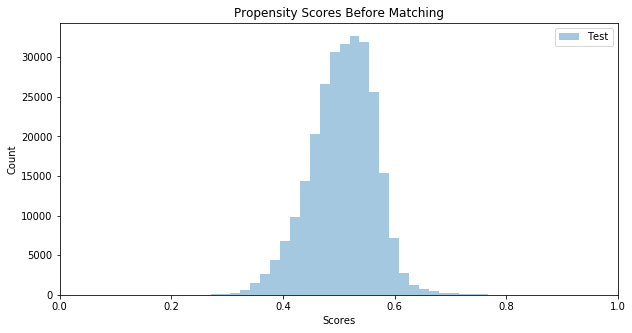

In [16]:
#sns.distplot(m.data[m.data['treatment']==0].scores, kde=False, norm_hist=False, label='Control')
sns.distplot(m.data[m.data['treatment']==1].scores, kde=False, norm_hist=False, label='Test')
plt.legend(loc='upper right')
plt.xlim((0, 1))
plt.title("Propensity Scores Before Matching")
plt.ylabel("Count")
plt.xlabel("Scores")

Text(0.5, 0, 'Scores')

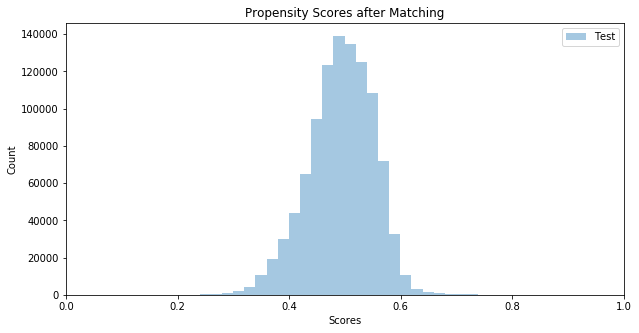

In [17]:
sns.distplot(m.data[m.data['treatment']==0].scores, kde=False, norm_hist=False, label='Test')
plt.legend(loc='upper right')
plt.xlim((0, 1))
plt.title("Propensity Scores after Matching")
plt.ylabel("Count")
plt.xlabel("Scores")

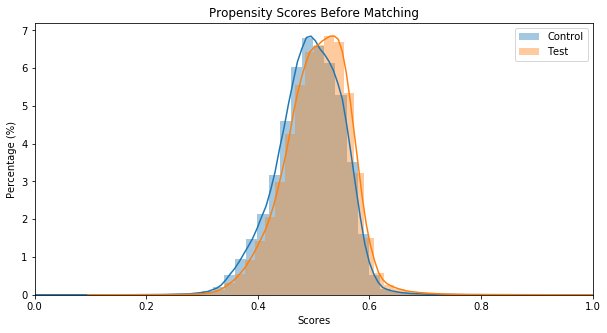

In [18]:
m.plot_scores()

Propensity score: probability of being treated (converted to Podcast)  
treatment vs control groups show distinctive distribution for propensity score   
we need to match

In [19]:
m.match(method="random", nmatches=1, threshold=0.00001)

Matching Control to Test...: 268641\268641

In [1]:
#m.record_frequency()

In [21]:
m.assign_weight_vector()

In [21]:
m.matched_data.sort_values("match_id").head(6)

,record_id,weight,user_id,weekday_stream_secs,weekend_stream_secs,morning_stream_sec,AF_stream_secs,EV_stream_secs,night_stream_secs,active_dates,...,num_main_artist,num_unique_tracks,acc_age,freeUsers,user_age_group,registration_funnel,user_gender,treatment,scores,match_id
0,0,1.0,ab8954a49c054e9a85e96df5895f61ca,272234.336,83408.264,57459.516,76320.780,87240.248,134622.056,5,...,21,52,366,1,5,spotify_com,female,1,0.293708,0
475419,3739476,1.0,ab7a25b95e8b47deb780acfe28ba5f3d,44116.600,13520.201,21066.891,745.346,8476.787,27347.777,32,...,36,275,1734,0,4,mobile,male,0,0.293669,0
1,1,1.0,ac7c8b29038842178023e1aa0be7f369,564478.703,623497.187,70271.249,16768.468,758392.804,342543.369,6,...,360,1607,1933,1,4,others,female,1,0.314160,1
350063,2551128,1.0,5aead7cda7a14335b1d4d77ecd6b08ae,40537.481,104069.838,13195.069,26765.212,62766.875,41880.163,36,...,193,314,562,0,2,mobile,female,0,0.314060,1
380259,2848796,1.0,f8a8a3b048c6484bb6573543ee6c9fe5,208176.090,198358.122,199181.166,67344.164,139916.781,92.101,54,...,773,1099,565,1,2,spotify_com,female,0,0.783128,2
2,2,1.0,7b4ff991a5dc45cd81e1b1a62f072913,260798.996,170730.058,112805.104,120660.342,90267.715,107795.893,6,...,1085,1443,1624,1,1,spotify_com,female,1,0.783116,2


In [22]:
finaldata = m.matched_data

In [23]:
#finaldata.to_csv("/Users/angli/Documents/documents/projects/data/matched_fullfeature.csv",index=False)
finaldata.to_csv("/Users/angli/Documents/documents/projects/data/matched_nonconverted.csv",index=False)

Text(0.5, 0, 'Scores')

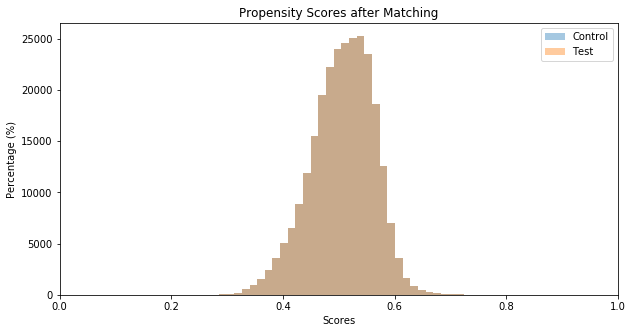

In [24]:
#finaldata
sns.distplot(finaldata[finaldata['treatment']==0].scores, kde=False, norm_hist=False, label='Control')
sns.distplot(finaldata[finaldata['treatment']==1].scores, kde=False, norm_hist=False, label='Test')
plt.legend(loc='upper right')
plt.xlim((0, 1))
plt.title("Propensity Scores after Matching")
plt.ylabel("Percentage (%)")
plt.xlabel("Scores")

### let's start post evaluation

In [10]:
#finaldata = pd.read_csv("/Users/angli/Documents/documents/projects/data/matched_fullfeature.csv")
finaldata = pd.read_csv("/Users/angli/Documents/documents/projects/data/matched_nonconverted.csv")

In [11]:
finaldata["user_age_group"].describe()

count    534602.000000
mean          2.060482
std           1.494368
min          -1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: user_age_group, dtype: float64

In [20]:
finaldata["user_age_group"].loc[finaldata["user_age_group"]=="unknown"]="-1"
finaldata["user_age_group"] = pd.to_numeric(finaldata["user_age_group"])

In [21]:
list(finaldata.columns.values)

['record_id',
 'weight',
 'user_id',
 'weekday_stream_secs',
 'weekend_stream_secs',
 'morning_stream_sec',
 'AF_stream_secs',
 'EV_stream_secs',
 'night_stream_secs',
 'active_dates',
 'total_num_streams',
 'total_stream_sec',
 'num_main_artist',
 'num_unique_tracks',
 'acc_age',
 'freeUsers',
 'user_age_group',
 'registration_funnel',
 'user_gender',
 'treatment',
 'scores',
 'match_id']

In [12]:
evl_cols = [
 'weekday_stream_secs',
 'weekend_stream_secs',
 'morning_stream_sec',
 'AF_stream_secs',
 'EV_stream_secs',
 'night_stream_secs',
 'active_dates',
 'total_num_streams',
 'total_stream_sec',
 'num_main_artist',
 'num_unique_tracks',
 'acc_age',
 'freeUsers',
'user_age_group']

In [13]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.tools.sm_exceptions import PerfectSeparationError
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from collections import Counter
from itertools import chain
import statsmodels.api as sm
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [14]:
def std_diff(a, b):
    sd = np.std(a.append(b))
    med = (np.median(a) - np.median(b)) * 1.0 / sd
    mean = (np.mean(a) - np.mean(b)) * 1.0 / sd
    return med, mean

In [15]:
def eval(treatment, control, col):
    trb, cob = treatment[col], control[col]
    tra = finaldata[finaldata["treatment"]==1][col]
    coa = finaldata[finaldata["treatment"]==0][col]
    xtb, xcb = ECDF(trb), ECDF(cob)
    xta, xca = ECDF(tra),ECDF(coa)
    std_diff_med_before, std_diff_mean_before = std_diff(trb, cob)
    print (std_diff_med_before, std_diff_mean_before)
    std_diff_med_after, std_diff_mean_after = std_diff(tra, coa)
    print (std_diff_med_after, std_diff_mean_after)
    #return (xtb, xcb, xta, xca, std_diff_med_before, std_diff_mean_before, std_diff_med_after, std_diff_mean_after)

#### evaluation for first match: music vs finders/lovers

In [17]:
for col in evl_cols:
    print (col)
    eval(treatment, control, col)
    print ("\n")

weekday_stream_secs
0.45141916950644156 0.4099209738043897
0.008024542053479739 -0.02031768386005736


weekend_stream_secs
0.4382519386530127 0.374815983738592
0.003718723512922127 -0.015719720239245706


morning_stream_sec
0.39614198905105164 0.37936318628302
0.018502993886577942 -0.0181828911811657


AF_stream_secs
0.47582933833861357 0.4245430327815154
0.021062734336100692 -0.017566522642554518


EV_stream_secs
0.40968381818417116 0.3649242017816455
-0.0017743078661418266 -0.014288880063925634


night_stream_secs
0.03140529875495764 0.12913969107851883
-0.004524214373777901 -0.013070023564765436


active_dates
1.0435055765802734 0.6579659643339985
0.0 -0.012218595414999433


total_num_streams
0.4451699640092571 0.4452845940661246
-0.021895885963053 -0.014262619435507542


total_stream_sec
0.45468168049103175 0.40414700519415814
0.0052536275485842165 -0.021411766808292276


num_main_artist
0.7689757520279746 0.7792865409671107
0.018140800551295654 -0.005156218958169934


num_unique_t

#### evaluation for the seekers vs. finders/lovers

In [16]:
for col in evl_cols:
    print (col)
    eval(treatment, control, col)
    print ("\n")

weekday_stream_secs
0.023708685208232667 0.009883014983741674
0.00933856495618377 -0.009337393160291405


weekend_stream_secs
0.004543973296974077 -0.01957168466334642
0.008245037174485593 -0.007249174433597501


morning_stream_sec
0.030072186469380244 0.02446859527469286
0.017098012191534367 -0.007761334054152146


AF_stream_secs
0.03133954537052175 0.01939126403489605
0.015749479768091157 -0.00718039143382298


EV_stream_secs
-0.01013872521414315 -0.03473046314567403
-0.004834623364738378 -0.007510650543520924


night_stream_secs
-0.0024721362249049694 -0.008888175846198141
-0.0025005407825969325 -0.006107992473528996


active_dates
0.0 0.020142911988180374
0.0 -0.003984369412062804


total_num_streams
0.010800297371601191 -0.019335130848220666
-0.0040471085679744745 -0.009324551156059036


total_stream_sec
0.0229683435633084 0.004200596492798405
0.010867362107467672 -0.00803354452466385


num_main_artist
-0.007749322489940723 -0.019945722989799557
-0.010831906148096437 -0.0003896108

(0, 897160.8588099997)

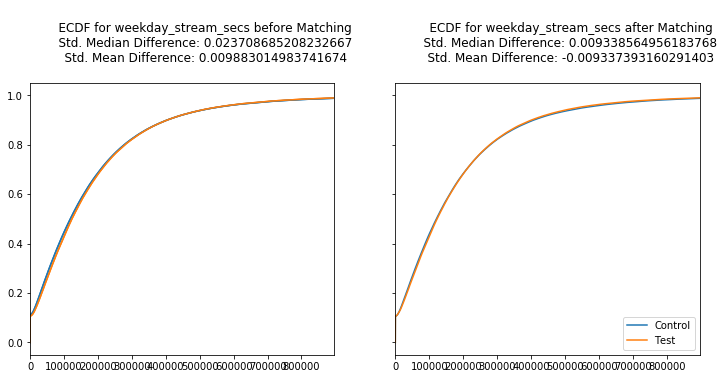

In [34]:
# plotting
control_color = "#1F77B4"
test_color = "#FF7F0E"
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 5))
ax1.plot(xcb.x, xcb.y, label='Control', color=control_color)
ax1.plot(xtb.x, xtb.y, label='Test', color=test_color)
ax1.plot(xcb.x, xcb.y, label='Control', color=control_color)
ax1.plot(xtb.x, xtb.y, label='Test', color=test_color)

title_str = '''
            ECDF for {} {} Matching
            Std. Median Difference: {}
            Std. Mean Difference: {}
            '''
ax1.set_title(title_str.format(col, "before", std_diff_med_before, std_diff_mean_before))
ax2.plot(xca.x, xca.y, label='Control')
ax2.plot(xta.x, xta.y, label='Test')
ax2.set_title(title_str.format(col, "after", std_diff_med_after, std_diff_mean_after))
ax2.legend(loc="lower right")
plt.xlim((0, np.percentile(xta.x, 99)))

### daily stream: before vs. after

In [1]:
from bqt import bqt

In [86]:
before_ts_data = bqt.query("""
SELECT PARSE_DATE('%Y%m%d',  date) as formated_date, FORMAT_DATE('%V', PARSE_DATE('%Y%m%d',  date)) as week_num, FORMAT_DATE('%A',PARSE_DATE('%Y%m%d',  date)) as DoW,
*
from `preamp-research.ang_sandbox.step_analysis_dailytrend_before_fullmatch00001`
""")

Query done! Processed: 2.5 K Billed: 10.5 M Cost: $0.00
Finished downloading results


In [87]:
before_ts_data.to_csv("/Users/angli/Documents/documents/projects/data/dailytrend_before_fullmatch00001.csv",index=False)

In [88]:
before_ts_data.columns

Index(['formated_date', 'week_num', 'DoW', 'date', 'tr_avg_num_streams',
       'tr_avg_stream_min', 'co_avg_num_streams', 'co_avg_stream_min'],
      dtype='object')

In [90]:
after_ts_data = bqt.query("""
SELECT PARSE_DATE('%Y%m%d',  date) as formated_date, FORMAT_DATE('%V', PARSE_DATE('%Y%m%d',  date)) as week_num, FORMAT_DATE('%A',PARSE_DATE('%Y%m%d',  date)) as DoW, *
from `preamp-research.ang_sandbox.step_analysis_dailytrend_all_after_fullmatch00001`
""")

Query done! Processed: 0.0 Billed: 0.0 Cost: $0.00
Finished downloading results


In [91]:
after_ts_data.to_csv("/Users/angli/Documents/documents/projects/data/dailytrend_all_after_fullmatch00001.csv",index=False)

In [92]:
after_ts_music_data = bqt.query("""
SELECT PARSE_DATE('%Y%m%d',  date) as formated_date, FORMAT_DATE('%V', PARSE_DATE('%Y%m%d',  date)) as week_num, FORMAT_DATE('%A',PARSE_DATE('%Y%m%d',  date)) as DoW, * 
from `preamp-research.ang_sandbox.step_analysis_dailytrend_music_after_fullfeatures_00001`
""")

Query done! Processed: 2.6 K Billed: 10.5 M Cost: $0.00
Finished downloading results


In [93]:
after_ts_music_data.to_csv("/Users/angli/Documents/documents/projects/data/dailytrend_music_after_fullfeatures_00001.csv",index=False)

In [94]:
after_ts_music_data.columns

Index(['formated_date', 'week_num', 'DoW', 'date', 'tr_avg_num_streams',
       'tr_avg_stream_min', 'co_avg_num_streams', 'co_avg_stream_min'],
      dtype='object')

this is for all streaming time on platform, before vs. after

In [95]:
before_after_ts_data = pd.concat([before_ts_data, after_ts_data], ignore_index=True)

In [96]:
before_after_ts_data.columns

Index(['formated_date', 'week_num', 'DoW', 'date', 'tr_avg_num_streams',
       'tr_avg_stream_min', 'co_avg_num_streams', 'co_avg_stream_min'],
      dtype='object')

In [74]:
week_aggre = before_after_ts_data.groupby(['week_num']).mean()

In [51]:
before_after_ts_data['date'] = pd.to_datetime(before_after_ts_data['date'])

before_after_ts_data.index = before_after_ts_data['date']
del before_after_ts_data['date']

daily consumption  
average over treatment/control

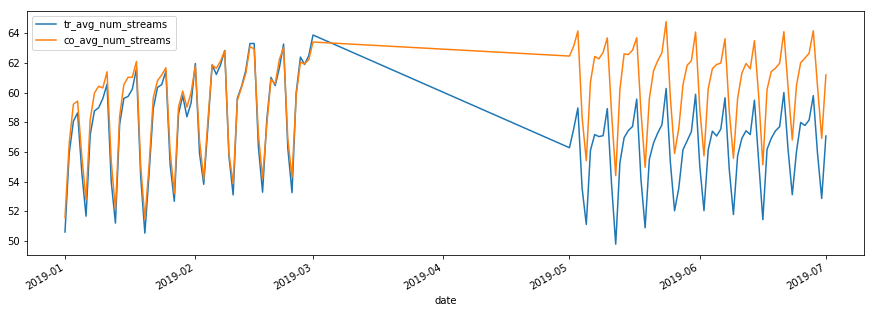

In [52]:
before_after_ts_data[["tr_avg_num_streams", "co_avg_num_streams"]].plot(figsize=(15,5))

In [104]:
#week_aggre[["tr_avg_num_streams", "co_avg_num_streams"]].plot(figsize=(15,5))

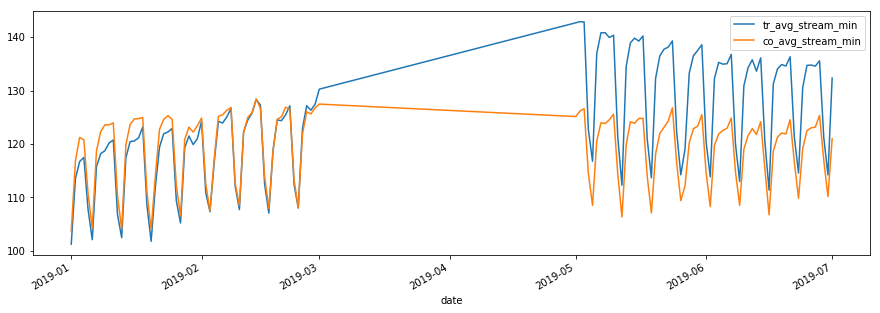

In [53]:
before_after_ts_data[["tr_avg_stream_min", "co_avg_stream_min"]].plot(figsize=(15,5))

In [103]:
#week_aggre[["tr_avg_stream_min", "co_avg_stream_min"]].plot(figsize=(15,5))

this is only music streaming time, before vs. after

In [99]:
before_after_music_ts_data = pd.concat([before_ts_data, after_ts_music_data], ignore_index=True)

In [100]:
week_aggre = before_after_music_ts_data.groupby(['week_num']).mean()

In [56]:
before_after_music_ts_data['date'] = pd.to_datetime(before_after_music_ts_data['date'])

before_after_music_ts_data.index = before_after_music_ts_data['date']
del before_after_music_ts_data['date']

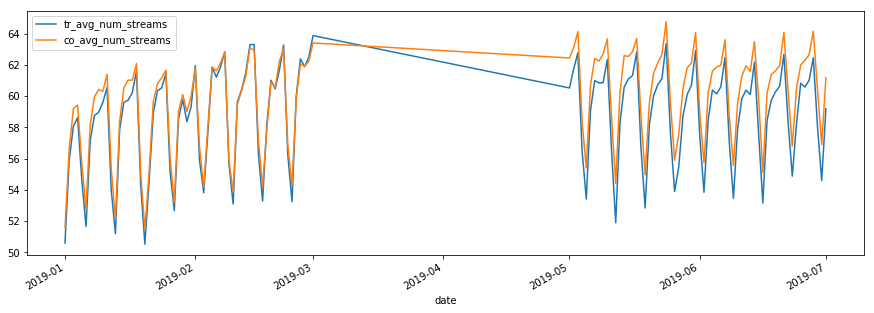

In [57]:
before_after_music_ts_data[["tr_avg_num_streams", "co_avg_num_streams"]].plot(figsize=(15,5))

In [105]:
#week_aggre[["tr_avg_num_streams", "co_avg_num_streams"]].plot(figsize=(15,5))

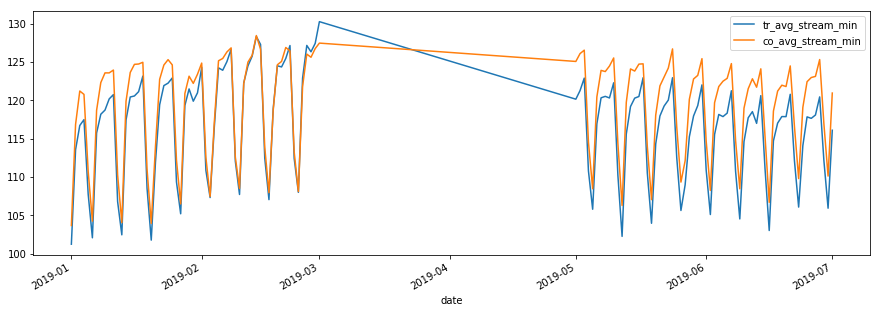

In [58]:
before_after_music_ts_data[["tr_avg_stream_min", "co_avg_stream_min"]].plot(figsize=(15,5))